In [ ]:
import pandas as pd

from statsbombpy import sb

from mplsoccer import Pitch

**Johan Cruyff**'s project based on open data provided by StatsBomb.

The focus of this analysis has been to understand how this all-time player is still influencing the modern game through his brilliant skills.

Indeed, I have analyzed dribbles, duel won and the passes received through the Pitch which has been devided accorfingly to the concept of **Juego Positional**

In [ ]:
## Identifying the comeptions available in StatsBomb
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [ ]:
sb.matches(competition_id = '43' , season_id = '51')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3888720,1974-07-07,18:00:00.000,International - FIFA World Cup,1974,Netherlands,Germany,1,2,available,...,None,7,Final,Olympiastadion München,Jack Taylor,Rinus Michels,Helmut Schön,1.1.0,2,2
1,3888719,1974-07-03,21:30:00.000,International - FIFA World Cup,1974,Netherlands,Brazil,2,0,available,...,None,6,1st Group Stage,Signal-Iduna-Park,Kurt Tschenscher,Rinus Michels,Mário Jorge Lobo Zagallo,1.1.0,2,2
2,3888718,1974-06-30,18:00:00.000,International - FIFA World Cup,1974,German DR,Netherlands,0,2,available,...,None,5,1st Group Stage,Parkstadion Obenende,Rudolf Scheurer,Georg Buschner,Rinus Michels,1.1.0,2,2
3,3888717,1974-06-26,21:30:00.000,International - FIFA World Cup,1974,Netherlands,Argentina,4,0,available,...,None,4,1st Group Stage,Parkstadion Obenende,Bobby Davidson,Rinus Michels,Vladislao Wenceslao Cap,1.1.0,2,2
4,3888716,1974-06-19,21:30:00.000,International - FIFA World Cup,1974,Netherlands,Sweden,0,0,available,...,None,2,1st Group Stage,Signal-Iduna-Park,Werner Winsemann,Rinus Michels,,1.1.0,2,2
5,3750180,1974-06-22,19:30:00.000,International - FIFA World Cup,1974,German DR,Germany,1,0,available,...,2021-06-13T16:17:31.694,3,1st Group Stage,Volksparkstadion,Ramón Ivanoes Barreto Ruiz,Georg Buschner,Helmut Schön,1.1.0,2,2


In [ ]:
## Creating a subset by considering only the matches played by Cruyff during the FIFA World Cup 1974
match_20 = sb.events(match_id = 3888720)
match_19 = sb.events(match_id = 3888719)
match_18 = sb.events(match_id = 3888718)
match_17 = sb.events(match_id = 3888717)
match_16 = sb.events(match_id = 3888716)

pdList = [match_20, match_19, match_18, match_17, match_16]  # List of your dataframes
match_tot = pd.concat(pdList)

In [ ]:
type(match_tot)

pandas.core.frame.DataFrame

In [ ]:
##Selcting only Johan Cruyff for this analysis

match_J = match_tot[match_tot['player'] == 'Johan Cruyff']

In [ ]:
match_J_sub = match_J[['ball_receipt_outcome', 'ball_recovery_offensive', 'carry_end_location', 'counterpress', 'dribble_outcome',
                        'duel_outcome', 'duel_type', 'duration',
                       'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute',
                       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_end_location', 'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length', 'pass_outcome',
                       'pass_recipient', 'pass_shot_assist', 'pass_straight', 'pass_switch', 'pass_technique', 'pass_through_ball', 'pass_type', 'possession', 'possession_team', 'possession_team_id', 'shot_end_location', 'shot_outcome',
                       'timestamp', 'type', 'under_pressure',
                       ]]

In [ ]:
match_J_sub.pass_recipient.unique()

array(['Willem van Hanegem', 'Wim Rijsbergen', 'Wim Suurbier',
       'Rob Rensenbrink', 'Arie Haan', 'Johnny Rep', 'Johan Neeskens',
       'Wim Jansen', 'Ruud Krol', nan, 'René van de Kerkhof',
       'Theo de Jong', 'Jan Jongbloed', 'Piet Keizer'], dtype=object)

In [ ]:
match_J_duel = match_J_sub[(match_J_sub['duel_outcome'] == 'Won') | (match_J_sub['duel_outcome'] == 'Success In Play') | (match_J_sub['dribble_outcome'] == 'Complete') | (match_J_sub['pass_shot_assist'] == 'True') ]
match_J_duel[['location', 'under_pressure','type']]

,location,under_pressure,type,pass_length
2930,"[32.0, 42.7]",True,Dribble,NaN
2938,"[79.3, 55.8]",True,Dribble,NaN
2951,"[70.6, 66.0]",True,Dribble,NaN
2960,"[92.0, 29.7]",True,Dribble,NaN
3050,"[33.8, 40.8]",True,Duel,NaN
3151,"[81.5, 38.2]",True,Dribble,NaN
2848,"[72.6, 27.0]",True,Duel,NaN
2849,"[63.7, 45.6]",True,Duel,NaN
3269,"[91.3, 12.1]",True,Dribble,NaN
3275,"[76.1, 19.7]",True,Dribble,NaN


In [ ]:
match_J_duel[['x_start', 'y_start']] = pd.DataFrame(match_J_duel['location'].tolist(), index=match_J_duel.index)

<ipython-input-93-7884b46c9043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_J_duel[['x_start', 'y_start']] = pd.DataFrame(match_J_duel['location'].tolist(), index=match_J_duel.index)
<ipython-input-93-7884b46c9043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_J_duel[['x_start', 'y_start']] = pd.DataFrame(match_J_duel['location'].tolist(), index=match_J_duel.index)


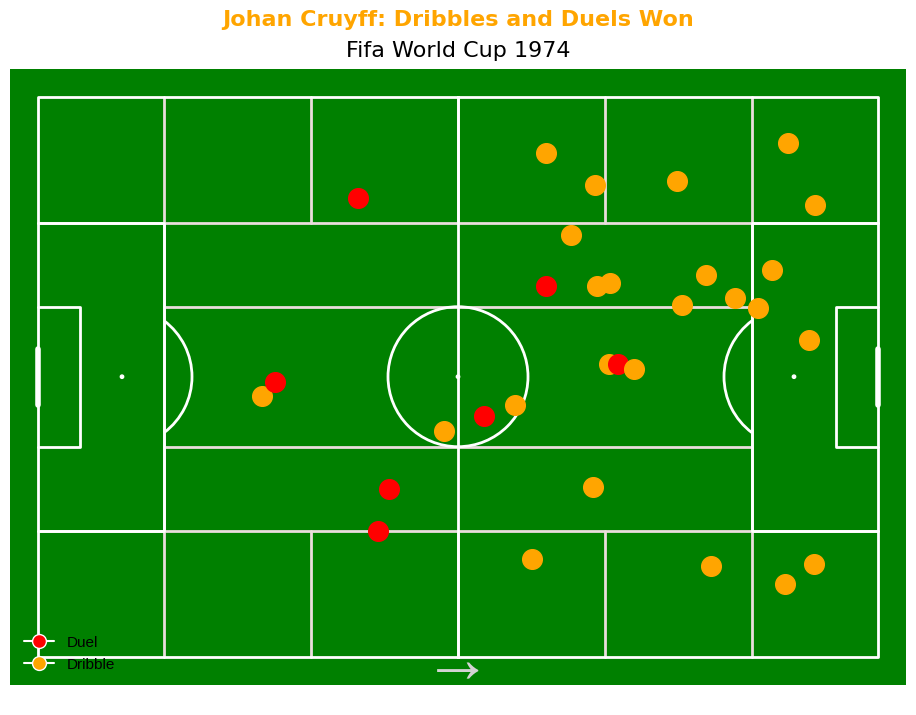

In [ ]:
# Create the scatterplot
import matplotlib.pyplot as plt
from mplsoccer import Pitch

fig, ax = plt.subplots(figsize=(12, 8))
pitch = Pitch(positional=True, pitch_type='statsbomb', pitch_color='green', line_color='white') #22312b
pitch.draw(ax=ax)

# Plot points with different colors for each type
for i, row in match_J_duel.iterrows():
    if row['type'] == 'Duel':
        pitch.scatter(row['x_start'], row['y_start'], s=200, marker='o', color='red', label='Successful Duel', ax=ax)
    elif row['type'] == 'Dribble':
        pitch.scatter(row['x_start'], row['y_start'], s=200, marker='o', color='orange', label='Successful Dribble', ax=ax)

# Set plot title
ax.text(0.5, 1.08, 'Johan Cruyff: Dribbles and Duels Won', fontsize=16, color='orange', ha='center', va='center', transform=ax.transAxes, fontname="DejaVu Sans",fontweight="bold")
ax.text(0.5, 1.03, 'Fifa World Cup 1974', fontsize=16, color='black', ha='center', va='center', transform=ax.transAxes, fontname="DejaVu Sans")

# Manually create the custom legend
legend_patches = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='red', markersize=10, label='Duel'),
                  plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='orange', markersize=10, label='Dribble')]

ax.legend(handles=legend_patches, loc='lower left', labelcolor = 'black', fontsize=11)

ax.text(0.5, 0.019, "→", \
          horizontalalignment='center', verticalalignment='center', color='lightgray', size='50', \
              transform=ax.transAxes)

plt.show()

In [ ]:
match_J_sub.duel_outcome.unique()

array([nan, 'Won', 'Success In Play'], dtype=object)

In [ ]:
match_J_sub = match_J_sub[match_J_sub['duel_outcome'] == 'Won']

In [ ]:
match_J_sub.dropna(subset=['location'], inplace=True)

In [ ]:
match_J_sub[['x_start', 'y_start']] = pd.DataFrame(match_J_sub['location'].tolist(), index=match_J_sub.index)

In [ ]:
match_J_sub.dropna(subset=['pass_end_location'], inplace=True)

In [ ]:
match_J_p_received = match_tot[match_tot['pass_recipient'] == 'Johan Cruyff']

In [ ]:
match_Netherland = match_tot[match_tot['team'] == 'Netherlands']

In [ ]:
pass_tot = match_Netherland['pass_recipient'].count()
pass_J = match_J_p_received.pass_recipient.count()

(pass_J / pass_tot) * 100

11.9523606975755

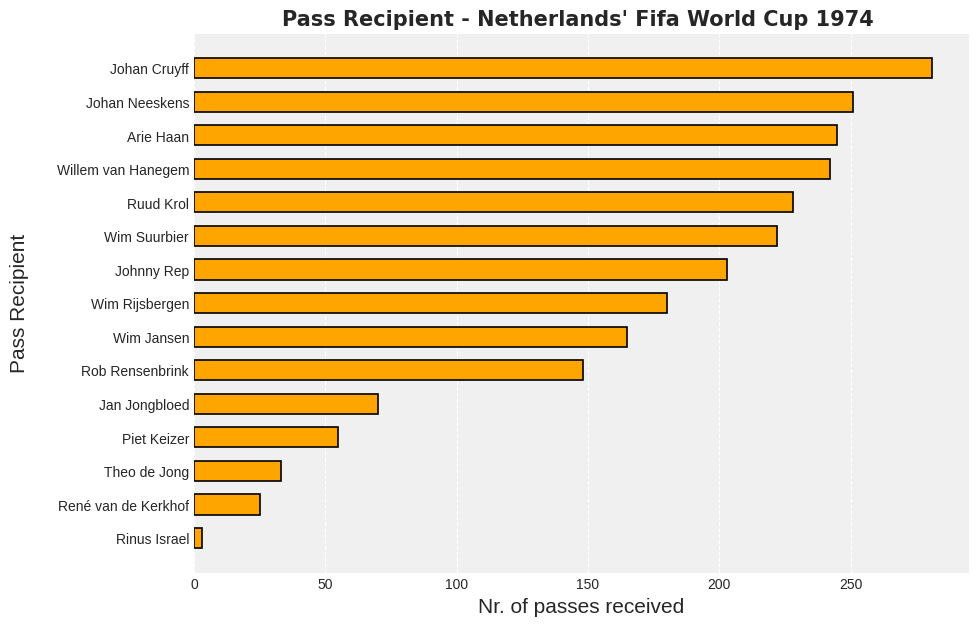

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)

# Count the occurrences of each pass_recipient and sort in ascending order
pass_recipient_counts = match_Netherland['pass_recipient'].value_counts().sort_values(ascending=True)

# Set up the plot
plt.figure(figsize=(10, 7))
plt.barh(pass_recipient_counts.index, pass_recipient_counts.values, color='orange', height=0.6, edgecolor='black', linewidth=1.2)

# Set labels and title
plt.xlabel('Nr. of passes received', fontsize=15)
plt.ylabel('Pass Recipient\n', fontsize=15)  # Add '\n' for a new line in the y-label

plt.title("Pass Recipient - Netherlands' Fifa World Cup 1974 ", fontsize=15, fontname="DejaVu Sans",fontweight="bold")

# Add background color and grid lines
plt.gca().set_facecolor('#f0f0f0')
plt.grid(axis='x', color='white', linestyle='--', linewidth=0.8)

plt.show()

In [ ]:
match_J_sub_p_received = match_J_p_received[['ball_receipt_outcome', 'duration',
                       'id', 'index', 'location', 'match_id', 'minute', 'pass_end_location', 'pass_height', 'pass_inswinging', 'pass_length', 'pass_outcome',
                       'pass_recipient', 'pass_straight', 'pass_technique', 'pass_type',
                       'timestamp', 'type', 'under_pressure',
                       ]]

In [ ]:
match_J_sub_p_received

,ball_receipt_outcome,duration,id,index,location,match_id,minute,pass_end_location,pass_height,pass_inswinging,...,pass_straight,pass_technique,pass_type,timestamp,type,under_pressure,x_start,y_start,x_end,y_end
15,NaN,3.017303,3400b74d-de10-4335-a2c9-af59fd6a3b19,30,"[53.1, 52.2]",3888720,0,"[55.0, 52.2]",Ground Pass,NaN,...,NaN,NaN,NaN,00:00:24.708,Pass,NaN,53.1,52.2,55.0,52.2
21,NaN,1.784195,51233811-9ee9-4bd7-8cf9-14f794a5d2bd,50,"[75.3, 10.5]",3888720,0,"[66.2, 38.9]",Ground Pass,NaN,...,NaN,NaN,NaN,00:00:45.134,Pass,NaN,75.3,10.5,66.2,38.9
71,NaN,1.386516,a655c28e-21ae-4445-a1c5-68717c18a306,250,"[55.6, 44.7]",3888720,6,"[57.6, 35.5]",Ground Pass,NaN,...,NaN,NaN,NaN,00:06:46.434,Pass,NaN,55.6,44.7,57.6,35.5
73,NaN,2.041428,b02209ac-cd19-4c7e-a8a8-b253faf20acb,257,"[97.3, 7.0]",3888720,6,"[112.5, 39.5]",High Pass,NaN,...,NaN,NaN,NaN,00:06:55.196,Pass,NaN,97.3,7.0,112.5,39.5
77,NaN,5.087397,07dbcf69-bbf9-4a74-8695-bcc58430d558,271,"[55.0, 35.0]",3888720,7,"[115.0, 11.7]",High Pass,NaN,...,NaN,NaN,NaN,00:07:16.658,Pass,NaN,55.0,35.0,115.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,NaN,2.342850,c9bea73c-241e-4db2-8d00-4683a6c88ea1,2781,"[47.1, 20.0]",3888716,79,"[74.5, 5.3]",High Pass,NaN,...,NaN,NaN,NaN,00:34:16.166,Pass,NaN,47.1,20.0,74.5,5.3
737,NaN,2.281903,84c222c4-4b65-475f-a16c-20e09f92f996,2812,"[28.5, 66.2]",3888716,80,"[74.3, 26.7]",High Pass,NaN,...,NaN,NaN,NaN,00:35:27.178,Pass,NaN,28.5,66.2,74.3,26.7
741,NaN,1.089645,5a806eae-bdfd-40b0-95b7-9bebbf21c2da,2828,"[22.9, 51.1]",3888716,81,"[74.1, 46.3]",Ground Pass,NaN,...,NaN,NaN,NaN,00:36:29.411,Pass,NaN,22.9,51.1,74.1,46.3
768,NaN,1.554695,34556e33-387d-43b8-ab27-3e1751898455,2918,"[91.2, 51.1]",3888716,84,"[99.7, 26.2]",High Pass,NaN,...,NaN,NaN,NaN,00:39:30.631,Pass,NaN,91.2,51.1,99.7,26.2


In [ ]:
match_J_sub_p_received[['x_start', 'y_start']] = pd.DataFrame(match_J_sub_p_received['location'].tolist(), index=match_J_sub_p_received.index)
match_J_sub_p_received[['x_end', 'y_end']] = pd.DataFrame(match_J_sub_p_received['pass_end_location'].tolist(), index=match_J_sub_p_received.index)

<ipython-input-180-96aba65273de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_J_sub_p_received[['x_start', 'y_start']] = pd.DataFrame(match_J_sub_p_received['location'].tolist(), index=match_J_sub_p_received.index)
<ipython-input-180-96aba65273de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_J_sub_p_received[['x_end', 'y_end']] = pd.DataFrame(match_J_sub_p_received['pass_end_location'].tolist(), index=match_J_sub_p_received.index)


In [ ]:
match_J_sub_p_received

In [1]:
#pip install cmasher

Text(0.5, 1.03, 'Fifa World Cup 1974')

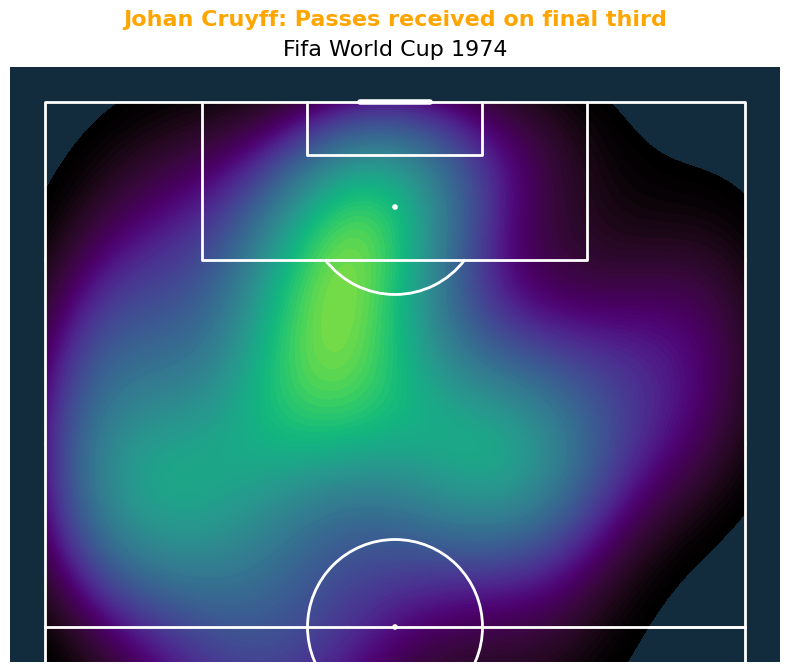

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

from mplsoccer import VerticalPitch, Sbopen
from mplsoccer.utils import FontManager


pitch = VerticalPitch(positional=True, half=True, line_color='white', line_zorder=2, pitch_color='#122c3d', pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(8,12))
# note use the colormap with 100 colors for a smoother finish
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_cmap_007.png'
kdeplot = pitch.kdeplot(match_J_sub_p_received.x_end, match_J_sub_p_received.y_end, ax=ax, cmap=cmr.lavender, fill=True, levels=100)

ax.text(0.5, 1.08, 'Johan Cruyff: Passes received on final third', fontsize=16, color='orange', ha='center', va='center', transform=ax.transAxes, fontname="DejaVu Sans",fontweight="bold")
ax.text(0.5, 1.03, 'Fifa World Cup 1974', fontsize=16, color='black', ha='center', va='center', transform=ax.transAxes, fontname="DejaVu Sans")